# Avaliação Final de Ciência dos dados

___
# Nome: GABARITO

___
### Leia atentamente as instruções da AF descritas na parte em papel e que devem ser seguidas rigorosamente aqui!

___


In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
dados = pd.read_excel("houseAF.xlsx")

In [5]:
dados.head()

,SalePrice,OverallQual,LotArea,X1stFlrSF,X2ndFlrSF,GarageCars,Fireplaces,CentralAir,YearBuilt,YrSold
0,208500,7,8450,856,854,2,0,1,2003,2008
1,181500,6,9600,1262,0,2,1,1,1976,2007
2,223500,7,11250,920,866,2,1,1,2001,2008
3,140000,7,9550,961,756,3,1,1,1915,2006
4,250000,8,14260,1145,1053,3,1,1,2000,2008


In [6]:
dados.columns

Index(['SalePrice', 'OverallQual', 'LotArea', 'X1stFlrSF', 'X2ndFlrSF',
       'GarageCars', 'Fireplaces', 'CentralAir', 'YearBuilt', 'YrSold'],
      dtype='object')

___
## (5,0 pontos) MODELO DE PREDIÇÃO

___
#### Considere que a variável `SalePrice` é a variável-alvo a ser predita e as demais variáveis da base de dados são as variáveis explicativas

#### Considerando a variável-alvo `SalePrice`, ajuste o modelo abaixo:

    o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)
 
    
#### Faça:

A. Divida a base de dados na parte treinamento e na parte teste. 

B. Ajuste um modelo de regressão linear múltipla para a parte treinamento.
Para as variáveis `X1stFlrSF` e `CentralAir` , discuta o significado da coluna `P>|t|` obtida do ajuste do modelo de regressão. Interprete esse resultado da forma mais completa e clara, porém sucinta.

C. Calcule os valores preditos da variável-alvo para a parte treinamento.

D. Construa um gráfico de dispersão dos valores observados para a variável-alvo versus os respectivos valores preditos.

E. Calcule a medida raiz do erro médio quadrático (RMS) descrita a seguir. Calcule essa medida tanto para a parte dos dados de treinamento como para a parte dos dados teste.
    
$$RMS=\sqrt{\frac{1}{n}\sum^n_{i=1}(y_i-f_i)^2}\mbox{, sendo } f_i \mbox{ valor predito de } y_i \mbox{ de acordo com modelo ajustado.}$$
    
F. Discuta se essa medida se comporta de forma semelhante para as duas partes de dados ou não, avaliando se há `overfitting` e `underfitting`.
    


Respostas:

A.

## Separando a base de dados em Treinamento e em Teste

In [7]:
y = dados.SalePrice
X = dados[['OverallQual', 'LotArea', 'X1stFlrSF', 'X2ndFlrSF',
       'GarageCars', 'Fireplaces', 'CentralAir', 'YearBuilt', 'YrSold']]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(Xtrain.shape, y_train.shape)
print(Xtest.shape, y_test.shape)

(1095, 9) (1095,)
(365, 9) (365,)


## MODELO DE REGRESSÃO LINEAR 

B.

In [10]:
import statsmodels.api as sm

In [11]:
### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [12]:
#Modelo de regressão com a parte que TREINA (Train)
results = regress(Xtrain,y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     393.9
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        15:20:34   Log-Likelihood:                -13136.
No. Observations:                1095   AIC:                         2.629e+04
Df Residuals:                    1085   BIC:                         2.634e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.287e+06   1.81e+06     -0.712      0.477   -4.83e+06    2.26e+06
OverallQual  2.175e+04   1370.758     15.868      0.000    1.91e+04    2.44e+04
LotArea         0.5753      0.138      4.161      0.000       0.304       0.847
X1stFlrSF      68.3411      4.375     15.620      0.000      59.757      76.926
X2ndFlrSF      43.4649      3.326     13.069      0.000      36.939      49.991
GarageCars   1.337e+04   2188.284      6.112      0.000    9080.340    1.77e+04
Fireplaces   5640.7381   2221.003      2.540      0.011    1282.791    9998.685
CentralAir   2395.0225   5216.973      0.459      0.646   -7841.477    1.26e+04
YearBuilt     350.5246     55.011      6.372      0.000     242.585     458.464
YrSold        255.8620    898.716      0.285      0.776   -1507.556    2019.280
==============================================================================
Omnibus:                      315.336   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29184.186
Skew:                          -0.151   Prob(JB):                         0.00
Kurtosis:                      28.290   Cond. No.                     2.18e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Ainda, Interpretar os coeficientes das duas variáveis descritas na pergunta!!**

C. e D.

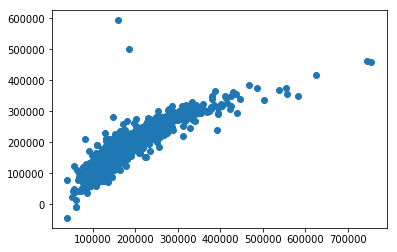

In [13]:
#Predict para TRAIN
y_pred_train = results.predict(sm.add_constant(Xtrain)) #Aqui, é necessário usar comando sm.add_constant para intercepto
#y_pred_train = results.predict(Xtrain) #Aqui, é necessário usar comando sm.add_constant para intercepto

plt.plot(y_train, y_pred_train, 'o')
plt.show()

E.

In [21]:
#Medida RMS para TRAIN
RMS_train= (((y_train - y_pred_train)** 2).sum()/len(y_train))**0.5
print('RMS train: ', RMS_train)

RMS train:  37518.51836221825


In [22]:
#Predict para TEST
y_pred_test = results.predict(sm.add_constant(Xtest)) #Aqui, é necessário usar comando sm.add_constant para intercepto

In [23]:
#Medida RMS para TEST
RMS_test= (((y_test - y_pred_test)** 2).sum()/len(y_test))**0.5
print('RMS test: ', RMS_test)

RMS test:  39310.27616802186


In [24]:
((RMS_test-RMS_train)/RMS_train)*100

4.7756624835375625

Aqui...

Concluir o quanto RMS_test aumenta ou cai comparado com RMS_train! Dependendo do resultado, pode-se concluir por bom ajuste ou por overfitting.

**Como a base de dados é pequena, esse % de variação pode variar bastante dependendo da partição criada em Train e Test!**